In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Avishi\Downloads\data_sentiment.csv")
#convert to binary
df['Stock Price Change Binary'] = (df['Stock Price Change'] > 0).astype(int)

In [3]:
features = ['polarity']
target = 'Stock Price Change Binary'
#divide into test and train
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

logreg_model = LogisticRegression(random_state=1, class_weight='balanced')
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

In [4]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        53
           1       0.79      0.79      0.79        43

    accuracy                           0.81        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.81      0.81      0.81        96



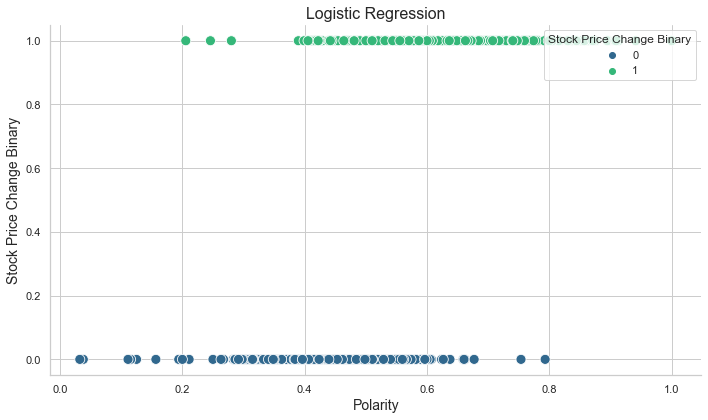

In [5]:
#plot
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='polarity', y='Stock Price Change Binary', data=df, hue='Stock Price Change Binary', palette='viridis', ax=ax, legend='full', s=100)
ax.set_xlabel('Polarity', fontsize=14)
ax.set_ylabel('Stock Price Change Binary', fontsize=14)
ax.set_title('Logistic Regression', fontsize=16)
ax.legend(title='Stock Price Change Binary', loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()